In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read data
df = pd.read_csv("../Dataset/SocialNetworkAds_Dataset.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


# DATA PREPROCESSING

In [4]:
# Separate features and labels
X = df.drop(labels=["Purchased"], axis=1)
y = df["Purchased"]

In [5]:
# Feaure scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

# DATA PREPARATION

In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

# MODELS

# Batch Gradient Descent

In [8]:
# Define Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
# Gradient Descent
def batch_gradient_descent(X, y, epochs=100, lr=0.001):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h-y))//m
        theta -= lr*gradient
        loss = -np.mean(y*np.log(h) + (1-y)*np.log(1-h))
        print(f"Loss afer epoch {epoch+1}: {loss}")
    return theta

In [10]:
def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

In [11]:
theta = batch_gradient_descent(X_train, y_train)
y_pred_batch = predict(X_test, theta)
y_pred_batch = [int(i) for i in y_pred_batch]

Loss afer epoch 1: 0.6931471805599453
Loss afer epoch 2: 0.692682276472142
Loss afer epoch 3: 0.6922179501946849
Loss afer epoch 4: 0.6917542017247387
Loss afer epoch 5: 0.6912910310575779
Loss afer epoch 6: 0.6908284381865872
Loss afer epoch 7: 0.690366423103261
Loss afer epoch 8: 0.6899049857972044
Loss afer epoch 9: 0.689444126256132
Loss afer epoch 10: 0.6889838444658705
Loss afer epoch 11: 0.6885241404103559
Loss afer epoch 12: 0.6880650140716364
Loss afer epoch 13: 0.6876064654298715
Loss afer epoch 14: 0.6871484944633319
Loss afer epoch 15: 0.6866911011484014
Loss afer epoch 16: 0.6862342854595759
Loss afer epoch 17: 0.6857780473694646
Loss afer epoch 18: 0.6853223868487903
Loss afer epoch 19: 0.6848673038663895
Loss afer epoch 20: 0.684412798389214
Loss afer epoch 21: 0.6839588703823305
Loss afer epoch 22: 0.6835055198089213
Loss afer epoch 23: 0.6830527466302856
Loss afer epoch 24: 0.6826005508058397
Loss afer epoch 25: 0.682148932293118
Loss afer epoch 26: 0.6816978910477733


In [12]:
# Save Batch Gradient Descent Model
joblib.dump(theta, '../Artifacts/Batch_Gradient_Descent_theta.pkl')

['../Artifacts/Batch_Gradient_Descent_theta.pkl']

In [13]:
# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_batch)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred_batch)}")

Accuracy: 0.8

		Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        50
           1       0.72      0.77      0.74        30

    accuracy                           0.80        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.80      0.80      0.80        80



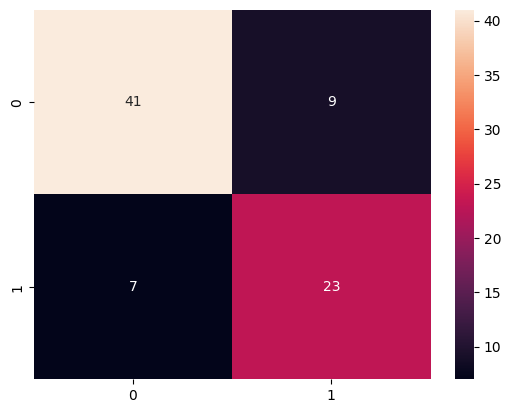

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_batch)
sns.heatmap(cm,annot=True)
plt.show()

In [15]:
# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_batch)

# AUC Score
auc = roc_auc_score(y_test, y_pred_batch)
print(f"ROC AUC Score: {auc}")

ROC AUC Score: 0.7933333333333334


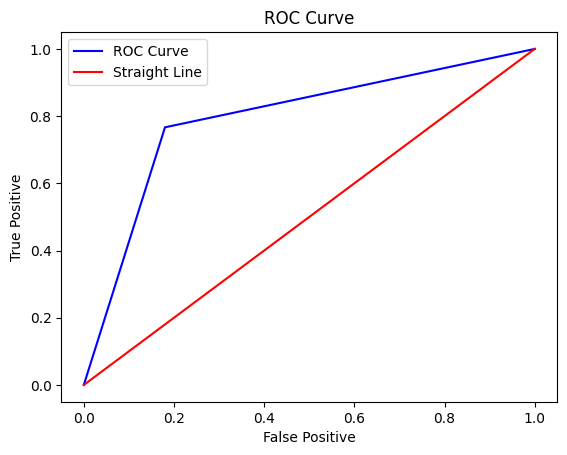

In [16]:
# Plot curve
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Stochastic Gradient Descent

In [17]:
def stochastic_gradient_descent(X, y, epochs=100, lr=0.001):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        loss = 0
        for i in range(m):
            Xi = X[i]
            yi = y[i]
            z = np.dot(Xi, theta)
            h = sigmoid(z)
            gradient = np.dot(Xi.T, (h-yi))
            theta -= lr*gradient
            loss += -np.mean(yi*np.log(h) + (1-yi)*np.log(1-h))
        print(f"Loss after epoch {epoch+1}: {loss/m}")
    return theta

In [18]:
def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

In [19]:
# Ensure X_train and y_train are NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

In [20]:
theta = stochastic_gradient_descent(X_train, y_train)
y_pred_sgd = predict(X_test, theta)
y_pred_sgd = [int(i) for i in y_pred_sgd]

Loss after epoch 1: 0.6755002857879315
Loss after epoch 2: 0.6437267025441625
Loss after epoch 3: 0.6171540614863925
Loss after epoch 4: 0.594827563631388
Loss after epoch 5: 0.5759587302101405
Loss after epoch 6: 0.5599087231040173
Loss after epoch 7: 0.5461651331568701
Loss after epoch 8: 0.5343185630420904
Loss after epoch 9: 0.5240418469446337
Loss after epoch 10: 0.5150727717279218
Loss after epoch 11: 0.5072002118752645
Loss after epoch 12: 0.500253218249895
Loss after epoch 13: 0.4940925159132738
Loss after epoch 14: 0.48860390515183705
Loss after epoch 15: 0.48369314042761696
Loss after epoch 16: 0.4792819471363613
Loss after epoch 17: 0.4753049114160895
Loss after epoch 18: 0.47170703988890866
Loss after epoch 19: 0.4684418346256634
Loss after epoch 20: 0.46546976580114086
Loss after epoch 21: 0.46275705272194356
Loss after epoch 22: 0.4602746851969582
Loss after epoch 23: 0.4579976332515379
Loss after epoch 24: 0.45590420526683495
Loss after epoch 25: 0.4539755237499226
Loss 

In [21]:
# Save Stochastic Gradient Descent Model
joblib.dump(theta, '../Artifacts/Stochastic_Gradient_Descent_theta.pkl')

['../Artifacts/Stochastic_Gradient_Descent_theta.pkl']

In [22]:
# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred_sgd)}")

Accuracy: 0.8625

		Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.74      0.97      0.84        30

    accuracy                           0.86        80
   macro avg       0.86      0.88      0.86        80
weighted avg       0.89      0.86      0.86        80



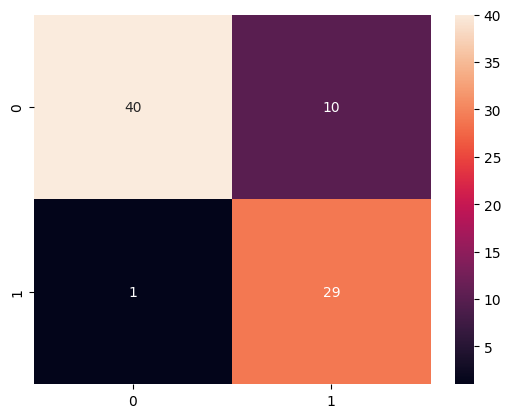

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm,annot=True)
plt.show()

In [24]:
# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_sgd)

# AUC Score
auc = roc_auc_score(y_test, y_pred_sgd)
print(f"ROC AUC Score: {auc}")

ROC AUC Score: 0.8833333333333334


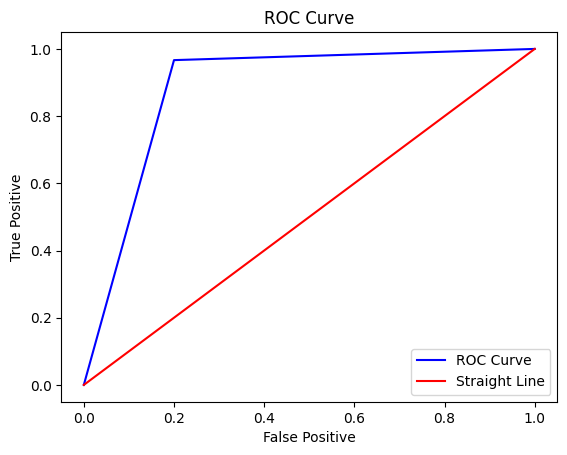

In [25]:
# Plot curve
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Mini Batch Gradient Descent


In [26]:
# Define Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [27]:
# Gradient Descent
def mini_batch_gradient_descent(X, y, epochs=100, lr=0.001, batch_size=32):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        loss=0
        for batch in range(1,(X.shape[0]//batch_size)+1):
            Xi = X[batch_size*(batch-1):batch_size*batch, :]
            yi = y[batch_size*(batch-1):batch_size*batch]
            z = np.dot(Xi, theta)
            h = sigmoid(z)
            gradient = np.dot(Xi.T, (h-yi))//m
            theta -= lr*gradient
            loss += -np.mean(yi*np.log(h) + (1-yi)*np.log(1-h))
        print(f"Loss afer epoch {epoch+1}: {loss/10}")
    return theta

In [28]:
def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

In [29]:
theta = mini_batch_gradient_descent(X_train, y_train)
y_pred_mini_batch = predict(X_test, theta)
y_pred_mini_batch = [int(i) for i in y_pred_mini_batch]

Loss afer epoch 1: 0.6911249765330184
Loss afer epoch 2: 0.6865264588673365
Loss afer epoch 3: 0.681985701762246
Loss afer epoch 4: 0.6775026695238939
Loss afer epoch 5: 0.6730773076565354
Loss afer epoch 6: 0.668709542958047
Loss afer epoch 7: 0.6645188787620505
Loss afer epoch 8: 0.6604039207483416
Loss afer epoch 9: 0.6563408564260621
Loss afer epoch 10: 0.6523295625103472
Loss afer epoch 11: 0.6483699012940811
Loss afer epoch 12: 0.6444617208592905
Loss afer epoch 13: 0.6406048553086565
Loss afer epoch 14: 0.6367991250162787
Loss afer epoch 15: 0.6330443368967792
Loss afer epoch 16: 0.6293402846917691
Loss afer epoch 17: 0.6256867492726557
Loss afer epoch 18: 0.6220834989587365
Loss afer epoch 19: 0.6185302898494784
Loss afer epoch 20: 0.6150268661698651
Loss afer epoch 21: 0.6115729606276696
Loss afer epoch 22: 0.6081682947814967
Loss afer epoch 23: 0.6048125794184331
Loss afer epoch 24: 0.6015055149401425
Loss afer epoch 25: 0.5982467917562457
Loss afer epoch 26: 0.59503609068384

In [30]:
# Save Mini Batch Gradient Descent Model
joblib.dump(theta, '../Artifacts/Mini_Batch_Gradient_Descent_theta.pkl')

['../Artifacts/Mini_Batch_Gradient_Descent_theta.pkl']

In [31]:
# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_mini_batch)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred_mini_batch)}")

Accuracy: 0.8375

		Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        50
           1       0.74      0.87      0.80        30

    accuracy                           0.84        80
   macro avg       0.83      0.84      0.83        80
weighted avg       0.85      0.84      0.84        80



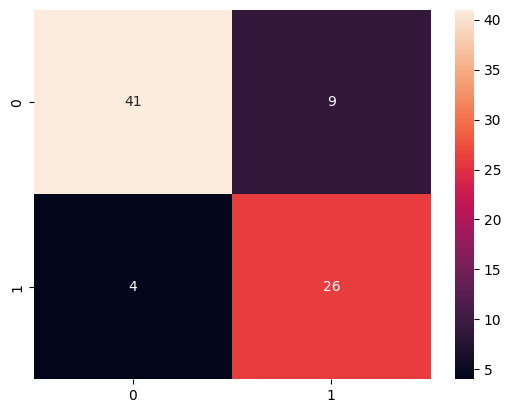

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mini_batch)
sns.heatmap(cm,annot=True)
plt.show()

In [33]:
# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_mini_batch)

# AUC Score
auc = roc_auc_score(y_test, y_pred_mini_batch)
print(f"ROC AUC Score: {auc}")

ROC AUC Score: 0.8433333333333334


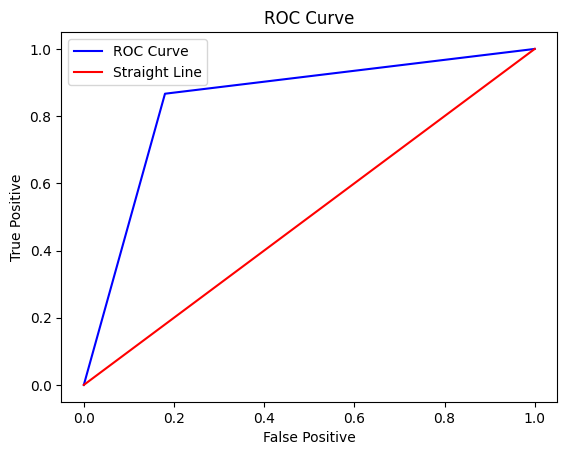

In [34]:
# Plot curve
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Logistic Regression

In [35]:
# Training
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [37]:
# Mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [38]:
# Gradient of sigmoid function
def sigmoid_gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [39]:
# Logistic regression using batch gradient descent
def logistic_regression(X, y, learning_rate=0.001, epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []
    for epoch in range(epochs):
        y_pred = sigmoid(np.dot(X, weights) + bias)
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)
        d_weights = (1 / n_samples) * np.dot(X.T, (y_pred - y) * sigmoid_gradient(y_pred))
        d_bias = (1 / n_samples) * np.sum((y_pred - y) * sigmoid_gradient(y_pred))
        weights -= learning_rate * d_weights
        bias -= learning_rate * d_bias
        print(f"Epoch {epoch}: Loss={loss}")
    return weights, bias

In [40]:
# Given data
X = np.array([[3], [5], [8], [1]])
y = np.array([0, 1, 1, 0])

In [41]:
# Train logistic regression model
weights, bias = logistic_regression(X, y, learning_rate=0.01, epochs=100)

Epoch 0: Loss=0.25
Epoch 1: Loss=0.24852373722527005
Epoch 2: Loss=0.2470924459467562
Epoch 3: Loss=0.24570496603733502
Epoch 4: Loss=0.24436014075806226
Epoch 5: Loss=0.24305681971491921
Epoch 6: Loss=0.2417938615082274
Epoch 7: Loss=0.2405701360925473
Epoch 8: Loss=0.23938452686499573
Epoch 9: Loss=0.23823593249983074
Epoch 10: Loss=0.23712326854689492
Epoch 11: Loss=0.23604546881110727
Epoch 12: Loss=0.23500148652968306
Epoch 13: Loss=0.23399029536315002
Epoch 14: Loss=0.2330108902155652
Epoch 15: Loss=0.23206228789860625
Epoch 16: Loss=0.23114352765346083
Epoch 17: Loss=0.23025367154365856
Epoch 18: Loss=0.2293918047312098
Epoch 19: Loss=0.22855703564763474
Epoch 20: Loss=0.22774849607069475
Epoch 21: Loss=0.2269653411168866
Epoch 22: Loss=0.22620674915903088
Epoch 23: Loss=0.22547192167758007
Epoch 24: Loss=0.22476008305359982
Epoch 25: Loss=0.22407048031073173
Epoch 26: Loss=0.2234023828128417
Epoch 27: Loss=0.22275508192347654
Epoch 28: Loss=0.22212789063271574
Epoch 29: Loss=0.

In [42]:
# Prediction
y_pred = lr.predict(X_test)

In [43]:
# Save Logistic Regression Model
joblib.dump(weights, '../Artifacts/Logistic_Regression_weights.pkl')
joblib.dump(bias, '../Artifacts/Logistic_Regression_bias.pkl')

['../Artifacts/Logistic_Regression_bias.pkl']

In [44]:
# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred)}")

Accuracy: 0.825

		Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        50
           1       0.86      0.63      0.73        30

    accuracy                           0.82        80
   macro avg       0.84      0.79      0.80        80
weighted avg       0.83      0.82      0.82        80



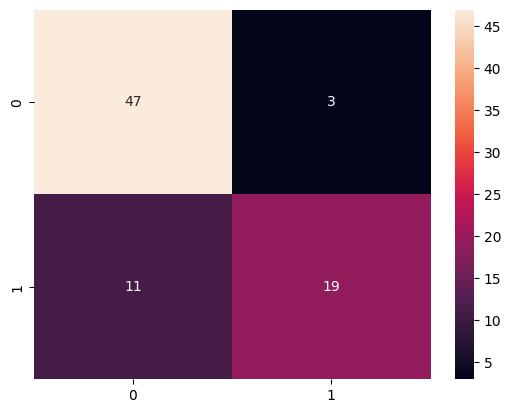

In [45]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [46]:
# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {auc}")

ROC AUC Score: 0.7866666666666666


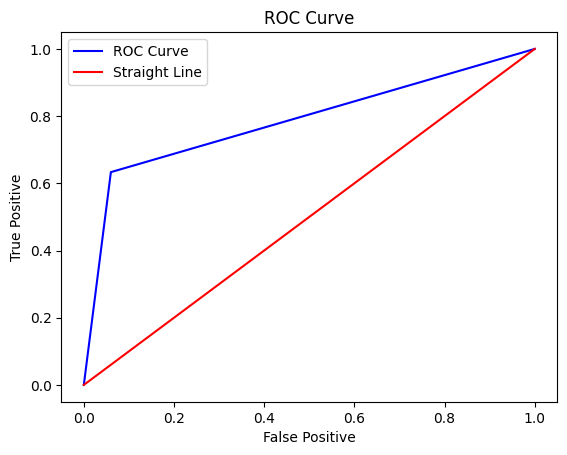

In [47]:
# Plot curve
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

# SAMLE PREDICTION

In [53]:
# Hardcode values for Age and EstimatedSalary
Age = 30
EstimatedSalary = 60000

In [54]:
# Create a new data point with these values
new_data_point = np.array([[Age, EstimatedSalary]])

In [55]:
# Feature scaling on the new data point using the same scaler
new_data_point_scaled = scaler.transform(new_data_point)

In [56]:
# Predict the outcome using the logistic regression model
prediction = lr.predict(new_data_point_scaled)
prediction_proba = lr.predict_proba(new_data_point_scaled)

In [57]:
# Print the prediction and probability
print(f"Predicted Label: {prediction[0]}")
print(f"Probability of each class: {prediction_proba[0]}")

Predicted Label: 0
Probability of each class: [0.95628229 0.04371771]
